### **Google Colab dan Kaggle Preparation**

In [ ]:
# Mount google drive to access necessary files and google colab functions.

from google.colab import drive
drive.mount('/content/gdrive')

# changing the working directory
%cd /content/gdrive/My Drive/bangkit/
# Install Kaggle library
!pip install -q kaggle
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
# uploaded = files.upload()
# kaggle.json already exists in Project PCD P2.
# Only if that one fails then you reupload.
# Read kaggle.json in your google drive project folder

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/bangkit"
# /content/gdrive/My Drive/PCD P2 Kamis is the path where kaggle.json is present in the Google Drive

Mounted at /content/gdrive
/content/gdrive/My Drive/bangkit


In [ ]:
# Install Kaggle library
!pip install -q kaggle

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
# uploaded = files.upload()
# kaggle.json already exists in Project PCD P2.
# Only if that one fails then you reupload.

In [ ]:
# Read kaggle.json in your google drive project folder

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/bangkit"
# /content/gdrive/My Drive/PCD P2 Kamis is the path where kaggle.json is present in the Google Drive

### Get Data Using API

In [ ]:
# API command to search datasets
!kaggle competitions download -c day-3-kaggle-competition

 96% 217M/225M [00:05<00:00, 52.4MB/s]
100% 225M/225M [00:06<00:00, 38.6MB/s]


In [ ]:
# unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: data_comp/data_comp/train/chair/img1337.jpg  
  inflating: data_comp/data_comp/train/chair/img1338.jpg  
  inflating: data_comp/data_comp/train/chair/img1339.jpg  
  inflating: data_comp/data_comp/train/chair/img134.jpg  
  inflating: data_comp/data_comp/train/chair/img1340.jpg  
  inflating: data_comp/data_comp/train/chair/img1341.jpg  
  inflating: data_comp/data_comp/train/chair/img1342.jpg  
  inflating: data_comp/data_comp/train/chair/img1343.jpg  
  inflating: data_comp/data_comp/train/chair/img1344.jpg  
  inflating: data_comp/data_comp/train/chair/img1345.jpg  
  inflating: data_comp/data_comp/train/chair/img1346.jpg  
  inflating: data_comp/data_comp/train/chair/img1347.jpg  
  inflating: data_comp/data_comp/train/chair/img1348.jpg  
  inflating: data_comp/data_comp/train/chair/img1349.jpg  
  inflating: data_comp/data_comp/train/chair/img135.jpg  
  inflating: data_comp/data_comp/train/chair/img1350.jpg  
  infla

In [ ]:
!rm -rf "/content/gdrive/My Drive/bangkit/data_comp/data_comp/train/sofa/"
!rm -rf "/content/gdrive/My Drive/bangkit/data_comp/data_comp/train/swivelchair/"

### Main Program


In [ ]:
base_dir='/content/gdrive/My Drive/bangkit/data_comp/data_comp/train/'

In [ ]:
os.listdir(base_dir)

['bed', 'chair', 'table']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest',
                        validation_split=0.4)

In [ ]:
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    shuffle = True,
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    subset = 'validation'
)

Found 2421 images belonging to 3 classes.
Found 1612 images belonging to 3 classes.


### 1. From scratch

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model.summary()

NameError: ignored

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    training_generator,
    steps_per_epoch=21,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=50, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
    )

Epoch 1/50
21/21 - 6s - loss: 0.7343 - accuracy: 0.6890 - val_loss: 0.6604 - val_accuracy: 0.7188 - 6s/epoch - 289ms/step
Epoch 2/50
21/21 - 6s - loss: 0.6138 - accuracy: 0.7564 - val_loss: 0.6921 - val_accuracy: 0.7500 - 6s/epoch - 282ms/step
Epoch 3/50
21/21 - 6s - loss: 0.5729 - accuracy: 0.7640 - val_loss: 0.5161 - val_accuracy: 0.7969 - 6s/epoch - 289ms/step
Epoch 4/50
21/21 - 6s - loss: 0.4918 - accuracy: 0.8036 - val_loss: 0.6465 - val_accuracy: 0.7422 - 6s/epoch - 292ms/step
Epoch 5/50
21/21 - 6s - loss: 0.4709 - accuracy: 0.8065 - val_loss: 0.2932 - val_accuracy: 0.8828 - 6s/epoch - 287ms/step
Epoch 6/50
21/21 - 6s - loss: 0.4552 - accuracy: 0.8290 - val_loss: 0.4330 - val_accuracy: 0.8594 - 6s/epoch - 286ms/step
Epoch 7/50
21/21 - 7s - loss: 0.3734 - accuracy: 0.8601 - val_loss: 0.4474 - val_accuracy: 0.7891 - 7s/epoch - 352ms/step
Epoch 8/50
21/21 - 6s - loss: 0.4534 - accuracy: 0.8363 - val_loss: 0.5049 - val_accuracy: 0.7969 - 6s/epoch - 291ms/step
Epoch 9/50
21/21 - 6s - 

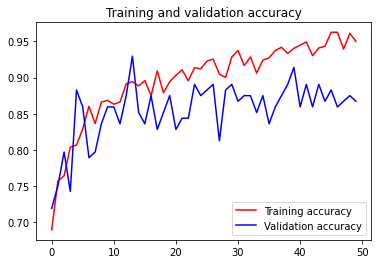

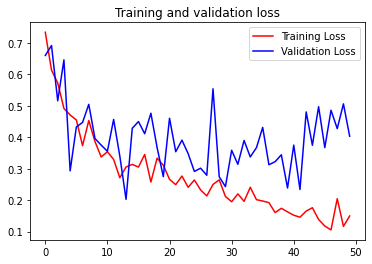

In [ ]:
import matplotlib.pyplot as plt

# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Mobilenet

### Testing

Saving img5.jpg to img5.jpg
img5.jpg
chair


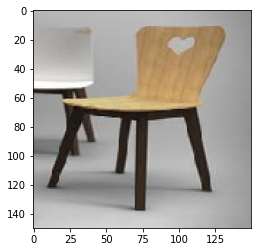

In [ ]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      if classes[0][0]==1:
        print('bed')
      elif classes[0][1]==1:
        print('chair')
      else:
        print('table')